# Assignment problem statement

Geely auto have contracted an automobile consulting company to help them understand them understand the factors on which the pricing of cars depends . specifically, they want to understand the factors affecting the pricing of the car in the american market, since those may be very different from the chinese market.  the company wants to know:
    
 - which variables are significant in predicting the price of the car
 - how well those variables describe the price of the car
    
what do you need to do?
   
   - create a linear model that describe the effect of the various features on price
   - the model should be interpretable so that the management can understand it

In [80]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [81]:
car_df=pd.read_csv("CarPrice_Assignment.csv")

In [82]:
car_df.describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
car_ID,205,103,59,1,52,103,154,205
symboling,205,0,1,-2,0,1,2,3
wheelbase,205,98,6,86,94,97,102,120
carlength,205,174,12,141,166,173,183,208
carwidth,205,65,2,60,64,65,66,72
carheight,205,53,2,47,52,54,55,59
curbweight,205,2555,520,1488,2145,2414,2935,4066
enginesize,205,126,41,61,97,120,141,326
boreratio,205,3,0,2,3,3,3,3
stroke,205,3,0,2,3,3,3,4


In [83]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [84]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [85]:
list(car_df.columns)

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [86]:
car_df.shape

(205, 26)

In [87]:
car_null=(round((car_df.isnull().sum().T/len(car_df)*100).sort_values(ascending=False),2))

In [88]:
print(car_null)

car_ID              0.0
symboling           0.0
highwaympg          0.0
citympg             0.0
peakrpm             0.0
horsepower          0.0
compressionratio    0.0
stroke              0.0
boreratio           0.0
fuelsystem          0.0
enginesize          0.0
cylindernumber      0.0
enginetype          0.0
curbweight          0.0
carheight           0.0
carwidth            0.0
carlength           0.0
wheelbase           0.0
enginelocation      0.0
drivewheel          0.0
carbody             0.0
doornumber          0.0
aspiration          0.0
fueltype            0.0
CarName             0.0
price               0.0
dtype: float64


In [89]:
car_df.dtypes.value_counts()

object     10
int64       8
float64     8
Name: count, dtype: int64

In [90]:
car_df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

<Axes: xlabel='fuelsystem', ylabel='price'>

<Figure size 640x480 with 0 Axes>

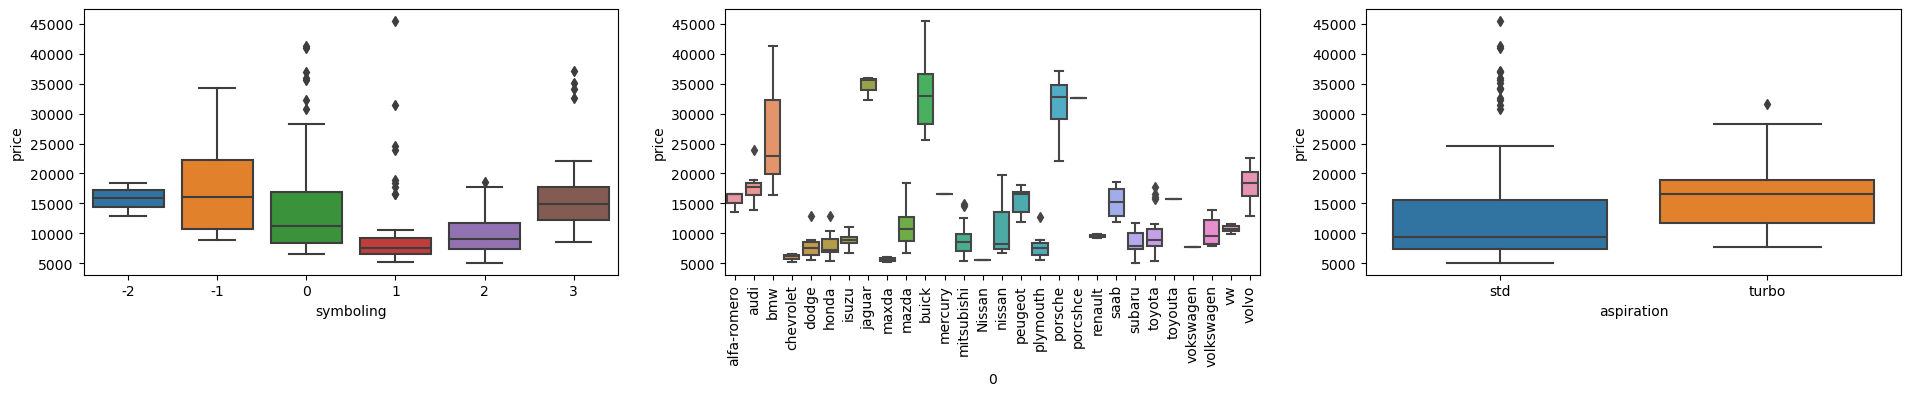

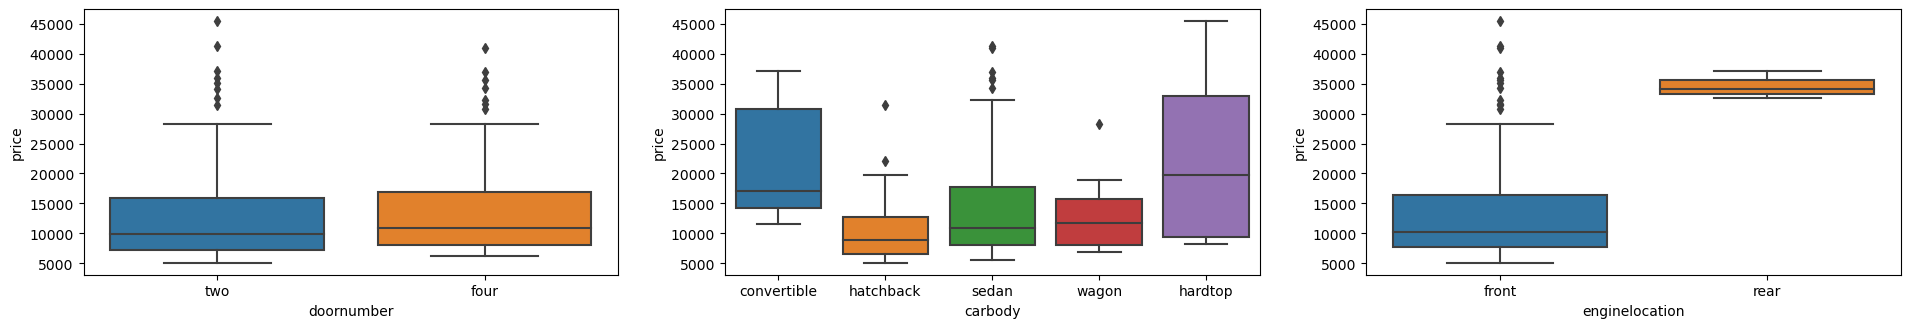

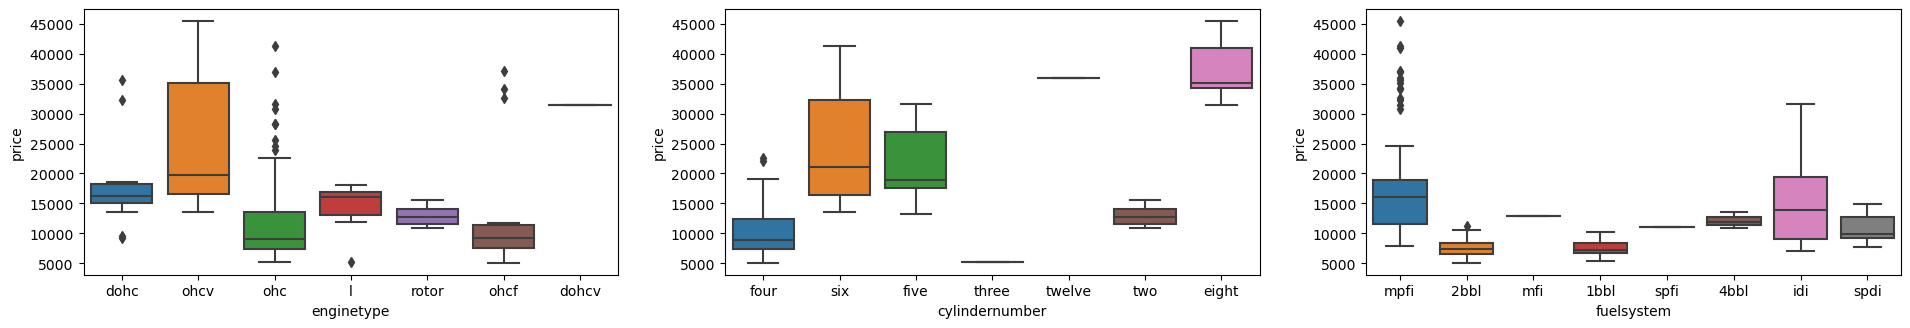

In [91]:
plt.figure(1)
plt.figure(figsize=(40,20))

plt.subplot(5,5,1)
sns.boxplot(x="symboling",y="price",data=car_df)

plt.subplot(5,5,2)
sns.boxplot(x=car_df["CarName"].str.split(" ",n=1,expand=True)[0],y="price",data=car_df)
plt.xticks(rotation=90)

plt.subplot(5,5,3)
sns.boxplot(x="aspiration",y="price",data=car_df)

plt.figure(2)
plt.figure(figsize=(40,20))
         
plt.subplot(5,5,1)
sns.boxplot(x="doornumber",y="price",data=car_df)

plt.subplot(5,5,2)
sns.boxplot(x="carbody",y="price",data=car_df)

plt.subplot(5,5,3)
sns.boxplot(x="enginelocation",y="price",data=car_df)

plt.figure(3)
plt.figure(figsize=(40,20))

plt.subplot(5,5,1)
sns.boxplot(x="enginetype",y="price",data=car_df)

plt.subplot(5,5,2)
sns.boxplot(x="cylindernumber",y="price",data=car_df)

plt.subplot(5,5,3)
sns.boxplot(x="fuelsystem",y="price",data=car_df)




In [92]:
"""Observations:
1) we can clearly see that cars of BMW,Buick,Porsche and jaguar are the highest
2) the turbo engined cars are more expensive than the standard engine ones
3)there is no much difference in price between a 2 door and a 4 door car
4) most of the Hardtop and convertible cars are the expensive ones but some of the sedan ones are even higher than  all other types
5) we can clearly see that the rear engined cars are more expensive than the front engined cars, because usually rear engined cars are the supercars
6) eight cylindered engine are more expensive than all others, but surprisingly six cylindered engine are the second most costliest but have more price range
"""

'Observations:\n1) we can clearly see that cars of BMW,Buick,Porsche and jaguar are the highest\n2) the turbo engined cars are more expensive than the standard engine ones\n3)there is no much difference in price between a 2 door and a 4 door car\n4) most of the Hardtop and convertible cars are the expensive ones but some of the sedan ones are even higher than  all other types\n5) we can clearly see that the rear engined cars are more expensive than the front engined cars, because usually rear engined cars are the supercars\n6) eight cylindered engine are more expensive than all others, but surprisingly six cylindered engine are the second most costliest but have more price range\n'

<Axes: xlabel='peakrpm', ylabel='price'>

<Figure size 640x480 with 0 Axes>

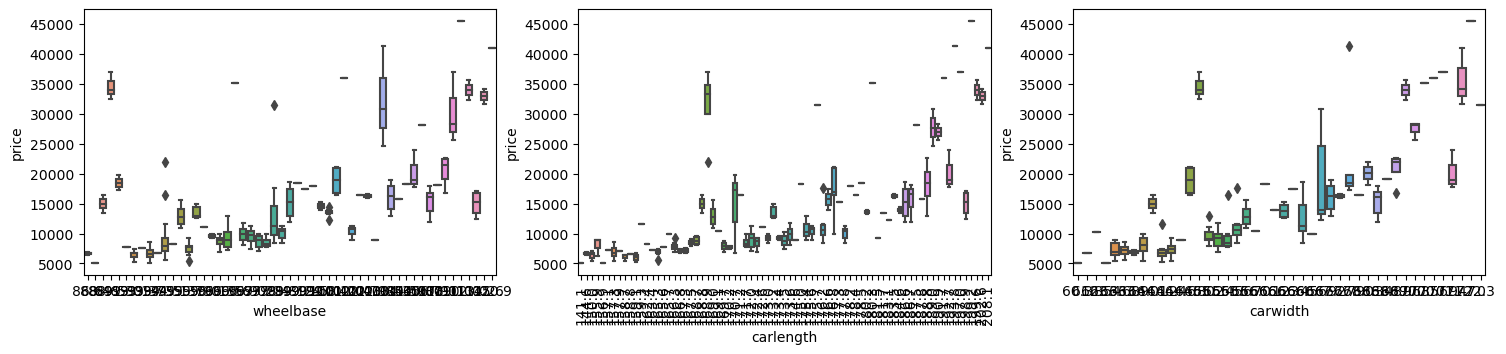

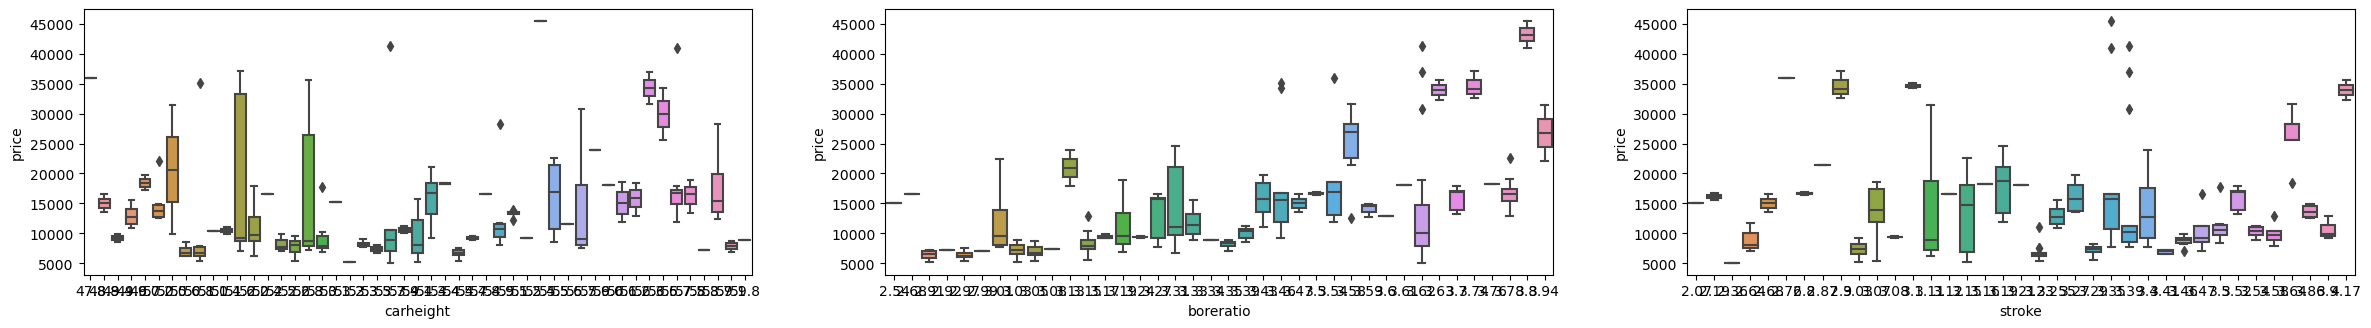

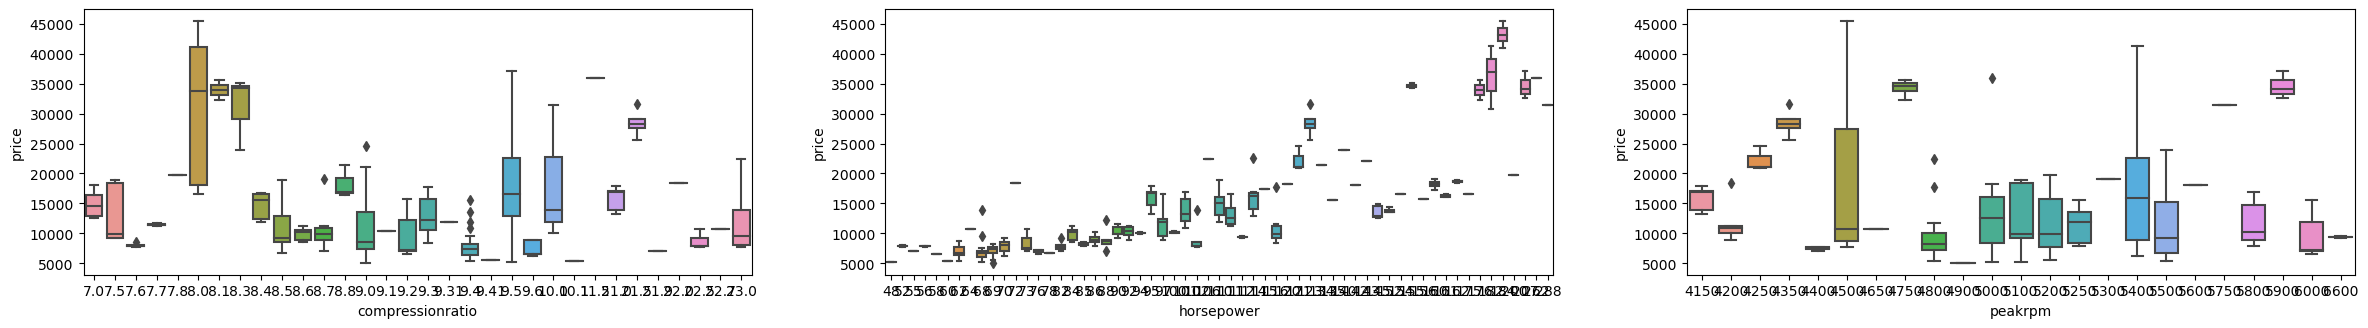

In [93]:
plt.figure(1)
plt.figure(figsize=(50,20))

plt.subplot(5,8,1)
sns.boxplot(x="wheelbase",y="price",data=car_df)

plt.subplot(5,8,2)
sns.boxplot(x="carlength",y="price",data=car_df)
plt.xticks(rotation=90)

plt.subplot(5,8,3)
sns.boxplot(x="carwidth",y="price",data=car_df)

plt.figure(2)
plt.figure(figsize=(50,20))

plt.subplot(5,5,1)
sns.boxplot(x="carheight",y="price",data=car_df)

plt.subplot(5,5,2)
sns.boxplot(x="boreratio",y="price",data=car_df)

plt.subplot(5,5,3)
sns.boxplot(x="stroke",y="price",data=car_df)

plt.figure(3)
plt.figure(figsize=(50,20))

plt.subplot(5,5,1)
sns.boxplot(x="compressionratio",y="price",data=car_df)

plt.subplot(5,5,2)
sns.boxplot(x="horsepower",y="price",data=car_df)

plt.subplot(5,5,3)
sns.boxplot(x="peakrpm",y="price",data=car_df)




In [94]:
corr_mat=car_df[["car_ID","symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]].corr()
cm_corr=sns.light_palette("green", as_cmap=True)
cm_corr=sns.diverging_palette(220,20,sep=20,as_cmap=True)
corr_mat.style.background_gradient(cmap=cm_corr)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [95]:
car_df["CarName"]=car_df["CarName"].str.split(" ",n=1,expand=True)[0]
print(car_df["CarName"])

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object


In [96]:
help(car_df["CarName"].str.split)

Help on method split in module pandas.core.strings.accessor:

split(pat: 'str | re.Pattern | None' = None, *, n=-1, expand: 'bool' = False, regex: 'bool | None' = None) method of pandas.core.strings.accessor.StringMethods instance
    Split strings around given separator/delimiter.
    
    Splits the string in the Series/Index from the beginning,
    at the specified delimiter string.
    
    Parameters
    ----------
    pat : str or compiled regex, optional
        String or regular expression to split on.
        If not specified, split on whitespace.
    n : int, default -1 (all)
        Limit number of splits in output.
        ``None``, 0 and -1 will be interpreted as return all splits.
    expand : bool, default False
        Expand the split strings into separate columns.
    
        - If ``True``, return DataFrame/MultiIndex expanding dimensionality.
        - If ``False``, return Series/Index, containing lists of strings.
    
    regex : bool, default None
        Determi

In [97]:
car_df["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [98]:
car_df["CarName"].value_counts()

CarName
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [99]:
car_df["CarName"]=car_df["CarName"].str.lower()
car_df["CarName"]=car_df["CarName"].str.replace("maxda","mazda")
car_df["CarName"]=car_df["CarName"].str.replace("toyouta","toyota")
car_df["CarName"]=car_df["CarName"].str.replace("vokswagen","volkswagen")
car_df["CarName"]=car_df["CarName"].str.replace("porcshce","porsche")
car_df.CarName.value_counts()

CarName
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen     10
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
vw              2
mercury         1
Name: count, dtype: int64

In [100]:
car_df["fueltype"].unique()

array(['gas', 'diesel'], dtype=object)

# 

In [101]:
car_df["doornumber"].unique()

array(['two', 'four'], dtype=object)

In [102]:
car_df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [103]:
car_df["enginelocation"].unique()

array(['front', 'rear'], dtype=object)

In [104]:
car_df["fueltype"]=car_df["fueltype"].map({"gas":1,"diesel":0})
car_df["doornumber"]=car_df["doornumber"].map({"four":1,"two":0})
car_df["aspiration"]=car_df["aspiration"].map({"turbo":1,"std":0})
car_df["enginelocation"]=car_df["enginelocation"].map({"front":1,"rear":0})

In [105]:
car_df[["fueltype","doornumber","aspiration","enginelocation"]]

,fueltype,doornumber,aspiration,enginelocation
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,1,0,1
4,1,1,0,1
...,...,...,...,...
200,1,1,0,1
201,1,1,1,1
202,1,1,0,1
203,0,1,1,1


In [106]:
car_df["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [107]:
carbody_dummy=pd.get_dummies(car_df["carbody"])
drivewheel_dummy=pd.get_dummies(car_df["drivewheel"])
enginetype_dummy=pd.get_dummies(car_df["enginetype"])
cylindernumber_dummy=pd.get_dummies(car_df["cylindernumber"])
fuelsystem_dummy=pd.get_dummies(car_df["fuelsystem"])

In [108]:
car_df["carbody"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: carbody
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [109]:
print(carbody_dummy)

     convertible  hardtop  hatchback  sedan  wagon
0           True    False      False  False  False
1           True    False      False  False  False
2          False    False       True  False  False
3          False    False      False   True  False
4          False    False      False   True  False
..           ...      ...        ...    ...    ...
200        False    False      False   True  False
201        False    False      False   True  False
202        False    False      False   True  False
203        False    False      False   True  False
204        False    False      False   True  False

[205 rows x 5 columns]


In [110]:
car_df=pd.concat([car_df,carbody_dummy],axis=1)

In [111]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,horsepower,peakrpm,citympg,highwaympg,price,convertible,hardtop,hatchback,sedan,wagon
0,1,3,alfa-romero,1,0,0,convertible,rwd,1,88.6,...,111,5000,21,27,13495.0,True,False,False,False,False
1,2,3,alfa-romero,1,0,0,convertible,rwd,1,88.6,...,111,5000,21,27,16500.0,True,False,False,False,False
2,3,1,alfa-romero,1,0,0,hatchback,rwd,1,94.5,...,154,5000,19,26,16500.0,False,False,True,False,False
3,4,2,audi,1,0,1,sedan,fwd,1,99.8,...,102,5500,24,30,13950.0,False,False,False,True,False
4,5,2,audi,1,0,1,sedan,4wd,1,99.4,...,115,5500,18,22,17450.0,False,False,False,True,False


In [112]:
car_df=pd.concat([car_df,drivewheel_dummy],axis=1)
car_df=pd.concat([car_df,enginetype_dummy],axis=1)
car_df=pd.concat([car_df,cylindernumber_dummy],axis=1)
car_df=pd.concat([car_df,fuelsystem_dummy],axis=1)

In [113]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,alfa-romero,1,0,0,convertible,rwd,1,88.6,...,False,False,False,False,False,False,False,True,False,False
1,2,3,alfa-romero,1,0,0,convertible,rwd,1,88.6,...,False,False,False,False,False,False,False,True,False,False
2,3,1,alfa-romero,1,0,0,hatchback,rwd,1,94.5,...,False,False,False,False,False,False,False,True,False,False
3,4,2,audi,1,0,1,sedan,fwd,1,99.8,...,False,False,False,False,False,False,False,True,False,False
4,5,2,audi,1,0,1,sedan,4wd,1,99.4,...,False,False,False,False,False,False,False,True,False,False


In [114]:
car_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'convertible', 'hardtop', 'hatchback', 'sedan', 'wagon', '4wd',
       'fwd', 'rwd', 'dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'eight', 'five', 'four', 'six', 'three', 'twelve', 'two', '1bbl',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [115]:
car_df=car_df.drop(["carbody","drivewheel","enginetype","cylindernumber","fuelsystem"],axis=1)

In [116]:
car_df.shape

(205, 51)

In [117]:
from sklearn.preprocessing import LabelEncoder

In [118]:
CarName_lbl=LabelEncoder()
car_df["CarName_Code"]=CarName_lbl.fit_transform(car_df["CarName"])
car_df["CarName_Code"]

0       0
1       0
2       0
3       1
4       1
       ..
200    21
201    21
202    21
203    21
204    21
Name: CarName_Code, Length: 205, dtype: int32

### WHAT IS THE DIFFERENCE BETWEEN GET_DUMMIES AND LABELENCODER()

In [119]:
df_train,df_test=train_test_split(car_df,train_size=0.7,test_size=0.3,random_state=100)

In [120]:
df_train[["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,98.523077,173.416783,65.839860,53.551748,2539.510490,124.958042,3.307413,3.250070,10.052587,102.552448,5130.069930,25.391608,30.874126,13056.347322
std,5.961835,12.598122,2.214203,2.433766,544.650539,40.974034,0.260997,0.312529,3.794890,39.722750,481.273979,6.701939,6.973660,7807.036883
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.680000,2.190000,7.000000,48.000000,4150.000000,13.000000,17.000000,5118.000000
25%,94.500000,165.650000,63.950000,51.800000,2121.000000,97.000000,3.065000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7554.000000
50%,96.500000,172.000000,65.400000,53.700000,2405.000000,110.000000,3.310000,3.270000,9.000000,94.000000,5200.000000,25.000000,31.000000,10198.000000
75%,101.200000,182.300000,66.900000,55.350000,2930.500000,141.000000,3.540000,3.400000,9.400000,116.000000,5500.000000,31.000000,36.500000,16465.000000
max,115.600000,202.600000,72.300000,59.100000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,41315.000000


In [121]:
scaler=MinMaxScaler()
num_vars=["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]
df_train[num_vars]
#df_train[num_vars]=scaler.fit_transform

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,93.7,167.3,63.8,50.8,2191,98,2.97,3.23,9.4,68,5500,31,38,7609.0
125,94.5,168.9,68.3,50.2,2778,151,3.94,3.11,9.5,143,5500,19,27,22018.0
166,94.5,168.7,64.0,52.6,2300,98,3.24,3.08,9.4,112,6600,26,29,9538.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
199,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22,18950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,96.3,172.4,65.4,51.6,2403,110,3.17,3.46,7.5,116,5500,23,30,9279.0
103,100.4,184.6,66.5,55.1,3060,181,3.43,3.27,9.0,152,5200,19,25,13499.0
67,110.0,190.9,70.3,56.5,3515,183,3.58,3.64,21.5,123,4350,22,25,25552.0
24,93.7,157.3,63.8,50.6,1967,90,2.97,3.23,9.4,68,5500,31,38,6229.0


In [122]:
df_train["wheelbase"].var()

35.54347778981582

In [123]:
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [124]:
num_vars=["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]


In [125]:
df_train[num_vars]

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.334483,0.508943,0.425000,0.336283,0.354926,0.184906,0.388889,0.641414,0.03125,0.283333,0.551020,0.277778,0.351351,0.114954
103,0.475862,0.707317,0.516667,0.646018,0.609775,0.452830,0.595238,0.545455,0.12500,0.433333,0.428571,0.166667,0.216216,0.231539
67,0.806897,0.809756,0.833333,0.769912,0.786268,0.460377,0.714286,0.732323,0.90625,0.312500,0.081633,0.250000,0.216216,0.564522
24,0.244828,0.263415,0.291667,0.247788,0.185803,0.109434,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.030693


In [126]:
help(scaler.fit_transform)

Help on method fit_transform in module sklearn.base:

fit_transform(X, y=None, **fit_params) method of sklearn.preprocessing._data.MinMaxScaler instance
    Fit to data, then transform it.
    
    Fits transformer to `X` and `y` with optional parameters `fit_params`
    and returns a transformed version of `X`.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Input samples.
    
    y :  array-like of shape (n_samples,) or (n_samples, n_outputs),                 default=None
        Target values (None for unsupervised transformations).
    
    **fit_params : dict
        Additional fit parameters.
    
    Returns
    -------
    X_new : ndarray array of shape (n_samples, n_features_new)
        Transformed array.



In [127]:
df_train[num_vars].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
num_vars=["CarName_Code","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]


In [129]:
y_train=df_train.pop("price")

In [130]:
X_train=df_train

In [131]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

In [132]:
X_train_numerical = X_train.select_dtypes(include = ['float64','int64'])
print(X_train_numerical.head())

     car_ID  symboling  fueltype  aspiration  doornumber  enginelocation  \
122     123          1         1           0           1               1   
125     126          3         1           0           0               1   
166     167          1         1           0           0               1   
1         2          3         1           0           0               1   
199     200         -1         1           1           1               1   

     wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
122   0.244828   0.426016  0.291667   0.265487    0.272692    0.139623   
125   0.272414   0.452033  0.666667   0.212389    0.500388    0.339623   
166   0.272414   0.448780  0.308333   0.424779    0.314973    0.139623   
1     0.068966   0.450407  0.316667   0.088496    0.411171    0.260377   
199   0.610345   0.775610  0.575000   0.858407    0.647401    0.260377   

     boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  \
122   0.230159  0.52

In [133]:
X_train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,CarName_Code
122,123,1,plymouth,1,0,1,1,0.244828,0.426016,0.291667,...,False,False,True,False,False,False,False,False,False,14
125,126,3,porsche,1,0,0,1,0.272414,0.452033,0.666667,...,False,False,False,False,False,False,True,False,False,15
166,167,1,toyota,1,0,0,1,0.272414,0.448780,0.308333,...,False,False,False,False,False,False,True,False,False,19
1,2,3,alfa-romero,1,0,0,1,0.068966,0.450407,0.316667,...,False,False,False,False,False,False,True,False,False,0
199,200,-1,volvo,1,1,1,1,0.610345,0.775610,0.575000,...,False,False,False,False,False,False,True,False,False,21


In [134]:
y_train.shape

(143,)

In [135]:
X_train.shape

(143, 51)

In [136]:
X_train.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'convertible', 'hardtop', 'hatchback', 'sedan', 'wagon', '4wd', 'fwd',
       'rwd', 'dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'eight',
       'five', 'four', 'six', 'three', 'twelve', 'two', '1bbl', '2bbl', '4bbl',
       'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'CarName_Code'],
      dtype='object')

In [137]:
y_train

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
         ...   
87     0.114954
103    0.231539
67     0.564522
24     0.030693
8      0.518192
Name: price, Length: 143, dtype: float64

In [138]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [139]:
lm=LinearRegression()


In [140]:
help(RFE)

Help on class RFE in module sklearn.feature_selection._rfe:

class RFE(sklearn.feature_selection._base.SelectorMixin, sklearn.base.MetaEstimatorMixin, sklearn.base.BaseEstimator)
 |  RFE(estimator, *, n_features_to_select=None, step=1, verbose=0, importance_getter='auto')
 |  
 |  Feature ranking with recursive feature elimination.
 |  
 |  Given an external estimator that assigns weights to features (e.g., the
 |  coefficients of a linear model), the goal of recursive feature elimination
 |  (RFE) is to select features by recursively considering smaller and smaller
 |  sets of features. First, the estimator is trained on the initial set of
 |  features and the importance of each feature is obtained either through
 |  any specific attribute or callable.
 |  Then, the least important features are pruned from current set of features.
 |  That procedure is recursively repeated on the pruned set until the desired
 |  number of features to select is eventually reached.
 |  
 |  Read more in

In [141]:
help(lm.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [142]:
lm.fit(X_train_numerical,y_train)


LinearRegression()

In [143]:
rfe=RFE(lm,n_features_to_select=15)

In [144]:
rfe=rfe.fit(X_train_numerical,y_train)

In [145]:
print(list(zip(X_train_numerical.columns,rfe.support_,rfe.ranking_)))

[('car_ID', False, 5), ('symboling', False, 4), ('fueltype', True, 1), ('aspiration', False, 2), ('doornumber', True, 1), ('enginelocation', True, 1), ('wheelbase', True, 1), ('carlength', True, 1), ('carwidth', True, 1), ('carheight', False, 3), ('curbweight', True, 1), ('enginesize', True, 1), ('boreratio', True, 1), ('stroke', True, 1), ('compressionratio', True, 1), ('horsepower', True, 1), ('peakrpm', True, 1), ('citympg', True, 1), ('highwaympg', True, 1)]


In [146]:
col=X_train_numerical.columns[rfe.support_]
print(col)
col_didnotselect=X_train_numerical.columns[~rfe.support_]
print("Did not select")
print(col_didnotselect)

Index(['fueltype', 'doornumber', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')
Did not select
Index(['car_ID', 'symboling', 'aspiration', 'carheight'], dtype='object')


In [147]:
X_train_rfe=X_train_numerical[col]
X_train_rfe=sm.add_constant(X_train_rfe)

In [148]:
X_train_rfe

,const,fueltype,doornumber,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
122,1.0,1,1,1,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568
125,1.0,1,0,1,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270
166,1.0,1,0,1,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324
1,1.0,1,0,1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270
199,1.0,1,1,1,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1.0,1,1,1,0.334483,0.508943,0.425000,0.354926,0.184906,0.388889,0.641414,0.03125,0.283333,0.551020,0.277778,0.351351
103,1.0,1,1,1,0.475862,0.707317,0.516667,0.609775,0.452830,0.595238,0.545455,0.12500,0.433333,0.428571,0.166667,0.216216
67,1.0,0,1,1,0.806897,0.809756,0.833333,0.786268,0.460377,0.714286,0.732323,0.90625,0.312500,0.081633,0.250000,0.216216
24,1.0,1,1,1,0.244828,0.263415,0.291667,0.185803,0.109434,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568


In [149]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [150]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     51.52
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.54e-46
Time:                        10:04:49   Log-Likelihood:                 156.95
No. Observations:                 143   AIC:                            -281.9
Df Residuals:                     127   BIC:                            -234.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3015      0.236  


# Summary

Today we studied about a case study of a car consulting company. We were given a dataset "CarPrice_Assignment.csv" to work on.
We had to preprocess the dataset and prepare it to implement linear regression to predict the car price based on all the attributes. First we checked for missing values and outliers, none were found. then we replaced the CarName column with only the car brand name by using:
- car_df["CarName"]=car_df["CarName"].str.split(" ",n=1,expand=True)[0]

Then we took the categorical columns and created dummy columns for each of their unique categories, where if an entry would belong to a specific category, like for carbody of type sedan, then that specific type calue will be true rest all value will be false. This was done by using "pd.get_dummies", which works on converting the values into one-hot code values

Then we used ValueEncoder to encode the Carname into specific values. Then we split our dataset into df_train and df_test dataframes.

Then we applied MinMaxScaler on df_train to standardize the values, then applied Scaler.fit_transform to transform it into values of same units and range.
For df_train dataset we split it into X_train andf y_train, where X_train contained all the numerical and float values(except price) whereas, y_train contained all the price values.

Then we fit the X_train and y_train data into Linear regression model and an RFE model. From the RFE model we found out the most relevant and important attributes to predict price by using rfe.ranking_ which ranked all the columns with numbers and lower the number, higher the importance

In [151]:
X_train_new=X_train_rfe.drop(["compressionratio"],axis=1)

In [152]:
X_train_lm=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_lm).fit()

In [153]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     55.64
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           2.02e-47
Time:                        10:04:50   Log-Likelihood:                 156.95
No. Observations:                 143   AIC:                            -283.9
Df Residuals:                     128   BIC:                            -239.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3137      0.134      2.

In [154]:
X_train_new1=X_train_new.drop(["horsepower"],axis=1)

In [155]:
X_train_lm1=sm.add_constant(X_train_new1)
lm=sm.OLS(y_train,X_train_lm1).fit()

In [156]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     60.03
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           3.50e-48
Time:                        10:06:59   Log-Likelihood:                 156.59
No. Observations:                 143   AIC:                            -285.2
Df Residuals:                     129   BIC:                            -243.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3214      0.134      2.

In [157]:
X_train_new2=X_train_new1.drop(["wheelbase"],axis=1)
X_train_lm2=sm.add_constant(X_train_new2)
lm=sm.OLS(y_train,X_train_lm2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     64.97
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           6.81e-49
Time:                        10:18:52   Log-Likelihood:                 156.05
No. Observations:                 143   AIC:                            -286.1
Df Residuals:                     130   BIC:                            -247.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2991      0.132      2.

In [158]:
X_train_new3=X_train_new2.drop(["carlength"],axis=1)
X_train_lm3=sm.add_constant(X_train_new3)
lm=sm.OLS(y_train,X_train_lm3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     71.16
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           9.65e-50
Time:                        10:21:19   Log-Likelihood:                 155.83
No. Observations:                 143   AIC:                            -287.7
Df Residuals:                     131   BIC:                            -252.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2905      0.131      2.

In [159]:
X_train_new4=X_train_new3.drop(["highwaympg"],axis=1)
X_train_lm4=sm.add_constant(X_train_new4)
lm=sm.OLS(y_train,X_train_lm4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     78.31
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.57e-50
Time:                        10:23:51   Log-Likelihood:                 155.39
No. Observations:                 143   AIC:                            -288.8
Df Residuals:                     132   BIC:                            -256.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3096      0.129      2.

In [160]:
X_train_new5=X_train_new4.drop(["citympg"],axis=1)
X_train_lm5=sm.add_constant(X_train_new5)
lm=sm.OLS(y_train,X_train_lm5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     87.49
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.83e-51
Time:                        10:24:35   Log-Likelihood:                 155.26
No. Observations:                 143   AIC:                            -290.5
Df Residuals:                     133   BIC:                            -260.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2726      0.104      2.

In [161]:
X_train_new6=X_train_new5.drop(["fueltype"],axis=1)
X_train_lm6=sm.add_constant(X_train_new6)
lm=sm.OLS(y_train,X_train_lm6).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     97.78
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           3.96e-52
Time:                        10:25:19   Log-Likelihood:                 154.40
No. Observations:                 143   AIC:                            -290.8
Df Residuals:                     134   BIC:                            -264.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2558      0.104      2.

In [162]:
X_train_new7=X_train_new6.drop(["boreratio"],axis=1)
X_train_lm7=sm.add_constant(X_train_new7)
lm=sm.OLS(y_train,X_train_lm7).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.1
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.27e-52
Time:                        10:26:19   Log-Likelihood:                 153.05
No. Observations:                 143   AIC:                            -290.1
Df Residuals:                     135   BIC:                            -266.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1939      0.097      2.

In [163]:
X_train_new8=X_train_new7.drop(["stroke"],axis=1)
X_train_lm8=sm.add_constant(X_train_new8)
lm=sm.OLS(y_train,X_train_lm8).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     126.7
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           3.63e-53
Time:                        10:27:31   Log-Likelihood:                 151.76
No. Observations:                 143   AIC:                            -289.5
Df Residuals:                     136   BIC:                            -268.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1792      0.097      1.

In [164]:
X_train_new9=X_train_new8.drop(["doornumber"],axis=1)
X_train_lm9=sm.add_constant(X_train_new9)
lm=sm.OLS(y_train,X_train_lm9).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     149.8
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           9.83e-54
Time:                        10:28:20   Log-Likelihood:                 150.44
No. Observations:                 143   AIC:                            -288.9
Df Residuals:                     137   BIC:                            -271.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1601      0.096      1.

In [165]:
print(X_train_new9.columns)

Index(['const', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'peakrpm'],
      dtype='object')


In [166]:
X_train_new10=X_train_new9.drop(["const"],axis=1)

In [167]:
X_train_new10.columns

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'peakrpm'], dtype='object')

In [168]:
vif=pd.DataFrame()

In [169]:
X=X_train_new10
X.shape

(143, 5)

In [170]:
help(variance_inflation_factor)

Help on function variance_inflation_factor in module statsmodels.stats.outliers_influence:

variance_inflation_factor(exog, exog_idx)
    Variance inflation factor, VIF, for one exogenous variable
    
    The variance inflation factor is a measure for the increase of the
    variance of the parameter estimates if an additional variable, given by
    exog_idx is added to the linear regression. It is a measure for
    multicollinearity of the design matrix, exog.
    
    One recommendation is that if VIF is greater than 5, then the explanatory
    variable given by exog_idx is highly collinear with the other explanatory
    variables, and the parameter estimates will have large standard errors
    because of this.
    
    Parameters
    ----------
    exog : {ndarray, DataFrame}
        design matrix with all explanatory variables, as for example used in
        regression
    exog_idx : int
        index of the exogenous variable in the columns of exog
    
    Returns
    -------
  

In [171]:

vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
print(vif)

         Features    VIF
2      curbweight  35.22
1        carwidth  32.01
3      enginesize  13.87
0  enginelocation  12.37
4         peakrpm   5.14


In [172]:
y_train_price=lm.predict(X_train_lm9)

In [174]:
X_train_lm9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 122 to 8
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           143 non-null    float64
 1   enginelocation  143 non-null    int64  
 2   carwidth        143 non-null    float64
 3   curbweight      143 non-null    float64
 4   enginesize      143 non-null    float64
 5   peakrpm         143 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 7.8 KB


In [173]:
print(y_train_price)

122    0.084452
125    0.373587
166    0.150664
1      0.187344
199    0.334598
         ...   
87     0.172182
103    0.427399
67     0.532405
24     0.037460
8      0.432386
Length: 143, dtype: float64


<Axes: ylabel='Count'>

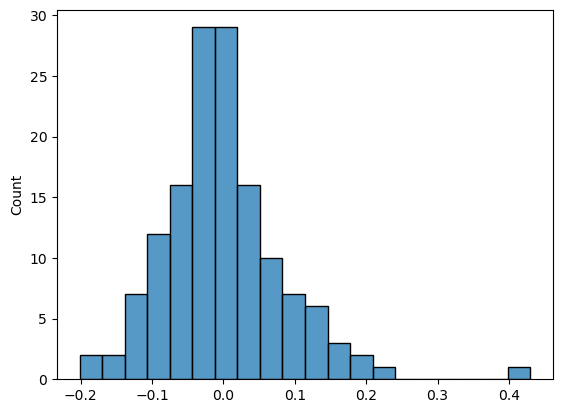

In [180]:
fig=plt.figure()
sns.histplot((y_train-y_train_price),bins=20)


In [182]:
num_vars=["wheelbase","carlength","carwidth","carheight",
          "curbweight","enginesize","boreratio","stroke",
          "compressionratio","horsepower","peakrpm","citympg",
          "highwaympg","price"]
df_test[num_vars]=scaler.transform(df_test[num_vars])


In [181]:
help(scaler.transform)

Help on method transform in module sklearn.preprocessing._data:

transform(X) method of sklearn.preprocessing._data.MinMaxScaler instance
    Scale features of X according to feature_range.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Input data that will be transformed.
    
    Returns
    -------
    Xt : ndarray of shape (n_samples, n_features)
        Transformed data.



In [184]:
df_test[num_vars].head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
160,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,0.810811,0.072382
186,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459,0.093295
59,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0.405405,0.102964
165,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.115479
140,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0.378378,0.068652


In [185]:
y_test=df_test.pop("price")
X_test=df_test

In [186]:
y_test

160    0.072382
186    0.093295
59     0.102964
165    0.115479
140    0.068652
         ...   
28     0.105064
29     0.216758
182    0.073404
40     0.143023
128    0.881565
Name: price, Length: 62, dtype: float64

In [187]:
X_test


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,CarName_Code
160,161,0,toyota,1,0,1,1,0.313793,0.409756,0.341667,...,False,False,True,False,False,False,False,False,False,19
186,187,2,volkswagen,1,0,1,1,0.368966,0.497561,0.433333,...,False,False,False,False,False,False,True,False,False,20
59,60,1,mazda,1,0,0,1,0.420690,0.596748,0.516667,...,False,False,True,False,False,False,False,False,False,9
165,166,1,toyota,1,0,0,1,0.272414,0.448780,0.308333,...,False,False,False,False,False,False,True,False,False,19
140,141,2,subaru,1,0,0,1,0.231034,0.263415,0.291667,...,False,False,True,False,False,False,False,False,False,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,29,-1,dodge,1,0,1,1,0.575862,0.544715,0.358333,...,False,False,True,False,False,False,False,False,False,5
29,30,3,dodge,1,1,0,1,0.320690,0.521951,0.500000,...,False,False,False,False,False,True,False,False,False,5
182,183,2,volkswagen,0,0,0,1,0.368966,0.497561,0.433333,...,False,False,False,False,True,False,False,False,False,20
40,41,0,honda,1,0,1,1,0.341379,0.557724,0.183333,...,False,True,False,False,False,False,False,False,False,6


In [188]:
X_test_new=X_test[X_train_new10.columns]
X_test_new=sm.add_constant(X_test_new)
y_pred=lm.predict(X_test_new)

In [189]:
print(y_pred)

160    0.053858
186    0.144582
59     0.189328
165    0.146151
140    0.065407
         ...   
28     0.177937
29     0.325809
182    0.095967
40     0.121054
128    0.804357
Length: 62, dtype: float64


In [215]:
X_train_new10.columns

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'peakrpm'], dtype='object')

In [190]:
print(r2_score(y_true=y_test,y_pred=y_pred))

0.8779329847412373


In [205]:
X_test_new.columns

Index(['const', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'peakrpm'],
      dtype='object')

Text(0, 0.5, 'y_pred')

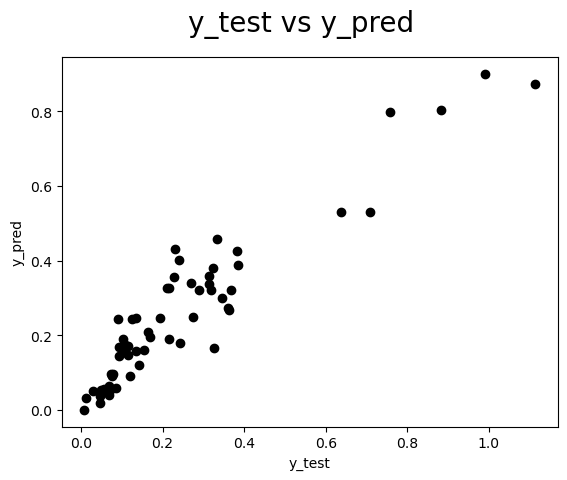

In [221]:
fig=plt.figure()
plt.scatter(y_test,y_pred,color="black")
fig.suptitle("y_test vs y_pred",fontsize=20)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [191]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single

R2 is a number which explains what portion of the given data variation is explained by the developed model. It always takes a value between 0 & 1.

Mathematically, it is represented as R2=1-(RSS/TSS)

RSS- total sum of error across the whole sa,ple. It is the mesure of dufference between rhe expected and actual output.

A small RSS indicates a tight fit of the moidel to the data.

TSS-It is the sum of errors of the data points from mean of response variable.

TSS=sum(1,n)(y-y(bar))

# Summary

using RFE we recursively dropped the attributes who had P value<0.05, until each and all of the remianing columns follow that condition. After that we used VIF on our train dataset and also found the distplot for the error between y_train and y_test. Again we prepare df_test by splitting it into X_test, y_test and transformed them using scaler.transform. then we used predict function to predict the y_pred value using the X_test values. at last we plotted a scatter plot between y_pred and y_test